In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from aptr.database import RnaDB
from aptr.oor_distance import oor_distance

In [51]:
db = RnaDB()

0.9991384261918438 sequences remain after trimming
0.6635554279149913 sequences remain after filtering


In [52]:
# How many genomes do we have?

db.db["genome"].nunique()

793

In [53]:
# For each genome, get the difference between max and min oor distance

best_spreads = (
    db.db["oor_distance"].groupby(db.db["genome"]).apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
)
best_spreads.head(50)

genome
2026188.14     0.996549
2704462.3      0.992947
39488.252      0.989904
1805475.3      0.982534
2518973.4      0.972254
104609.11      0.970642
1471761.3      0.967695
1591408.3      0.967685
1805431.3      0.964967
1628085.168    0.961591
1329796.4      0.958898
1890302.151    0.958438
1278073.14     0.953559
2758440.3      0.946844
1158606.4      0.942665
663.613        0.942591
1278232.5      0.939582
1178515.4      0.929684
672.345        0.926928
2086577.3      0.925392
1582259.3      0.924022
2587161.3      0.922092
77608.15       0.921089
38284.26       0.920248
2704463.3      0.918563
28230.3        0.917634
220688.4       0.916603
2565926.3      0.912507
1983719.3      0.910712
1435069.3      0.910248
1381081.15     0.910213
2020965.6      0.907296
865757.3       0.907111
1193713.4      0.905446
2682810.3      0.904775
61.7           0.902761
1894.18        0.899325
1177211.3      0.892866
28113.3        0.892599
1392877.3      0.892417
1449337.3      0.891190
1406.193 

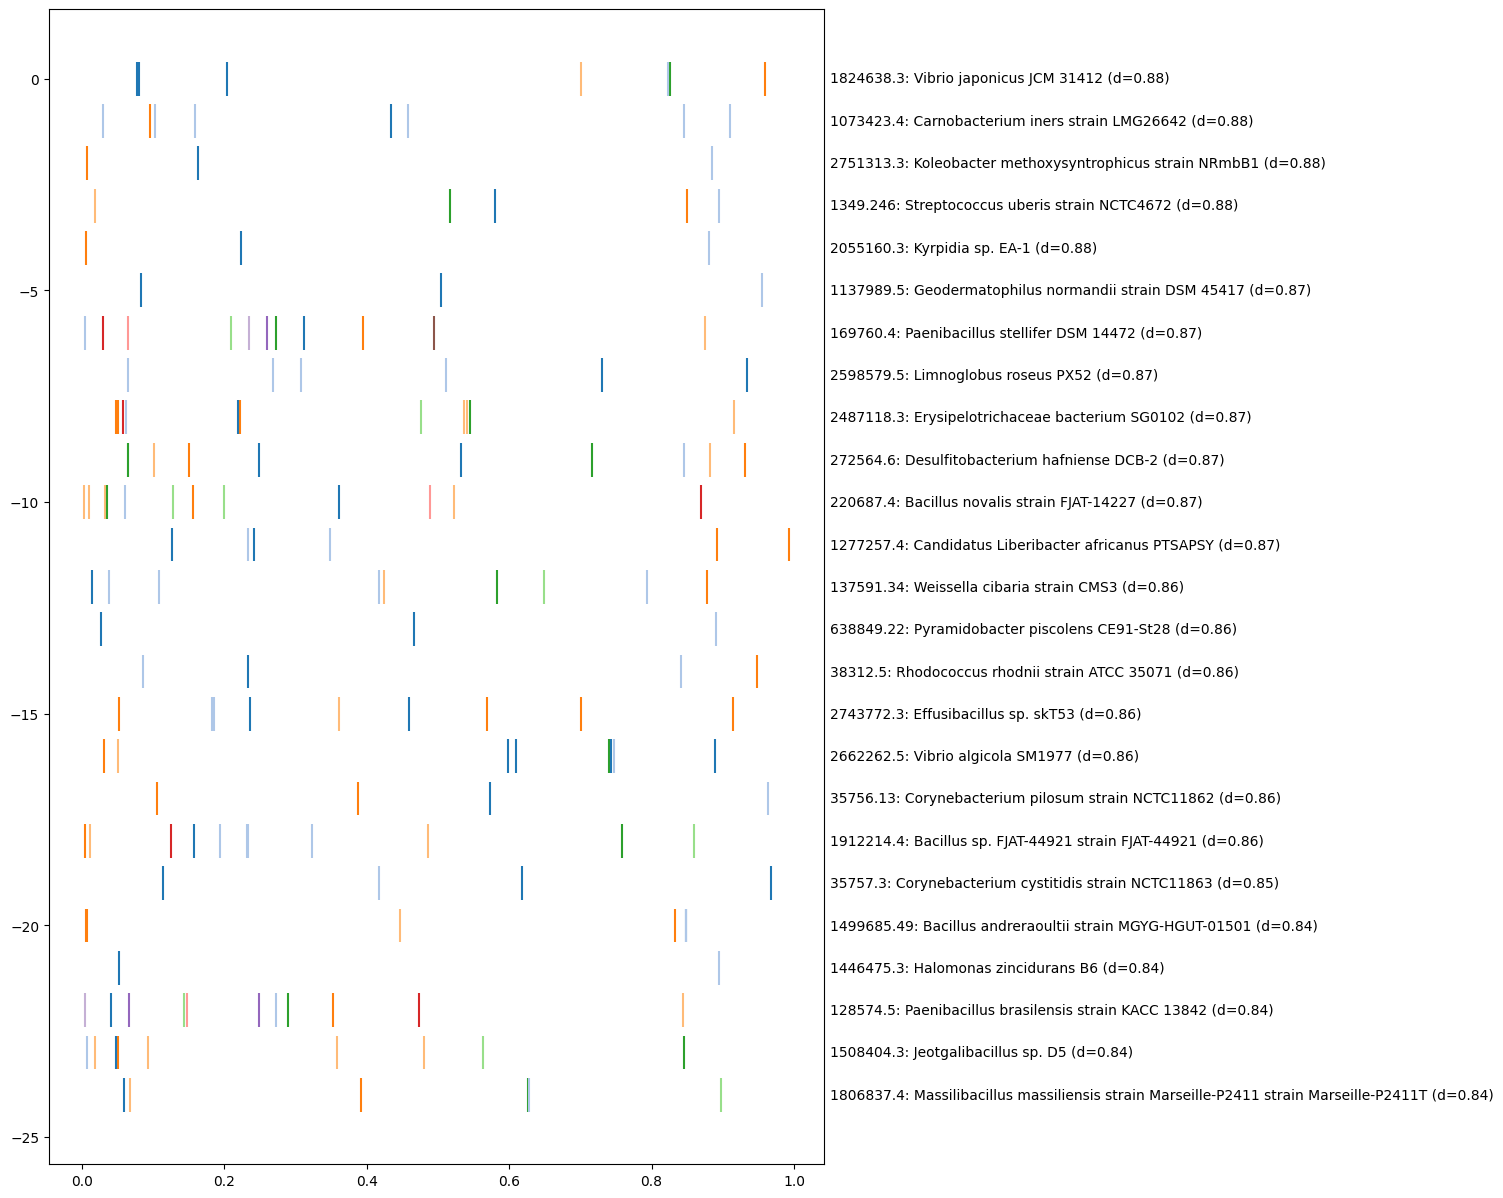

In [59]:
from matplotlib import cm

def visualize_genome(gid, height=0, dist=None):
    g = db[gid]
    colors = cm.tab20(g["md5"].astype("category").cat.codes)
    plt.vlines(g["oor_distance"], -height-.4, -height+.4, colors=colors, cmap="tab20")
    plt.text(1.05, -height, f"{gid}: {g['genome_name'].iloc[0]} (d={dist:.2f})", ha="left", va="center")


fig, ax = plt.subplots(figsize=(10, 15))
for i, gid in enumerate(best_spreads.iloc[50:75].index):
    visualize_genome(gid, i, best_spreads[gid])
# visualize_genome("1566358.3")

In [ ]:
# Converting IDs of some promising ones:
# 13057737.4    Algoriphagus marincola HL-49
#